Nama      : Aryawa Bintang Muhammad

Domisili  : Kab.Semarang, Jawa Tengah

email     : aryawabintang1999@gmail.com

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# import datasets
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download sanikamal/rock-paper-scissors-dataset
! unzip rock-paper-scissors-dataset

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: Rock-Paper-Scissors/train/paper/paper04-118.png  
  inflating: Rock-Paper-Scissors/train/paper/paper04-119.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-000.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-001.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-002.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-003.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-004.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-005.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-006.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-007.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-008.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-009.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-010.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-011.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-012.pn

In [38]:
test_dir = '/content/rock-paper-scissors/Rock-Paper-Scissors/test'
train_dir = '/content/rock-paper-scissors/Rock-Paper-Scissors/train'
base_dir =  '/content/rock-paper-scissors/Rock-Paper-Scissors'

In [39]:
os.listdir('/content/Rock-Paper-Scissors/test')

['rock', 'paper', 'scissors']

In [40]:
# Augmentasi Gambar
train_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  rotation_range = 20,
                  horizontal_flip = True,
                  shear_range = 0.2,
                  fill_mode = 'wrap',
                  validation_split = 0.4)

In [41]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    subset = 'training')

validation_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    subset = 'validation')

Found 1512 images belonging to 3 classes.
Found 147 images belonging to 3 classes.


In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [43]:
# Menghitung loss function dan optimizer
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']               
)

In [44]:
# Fungsi callbacks
batas_akurasi = 98e-2
class callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= batas_akurasi:
            print('\nUntuk Epoch', epoch, '\nAkurasi telah tercapai = %2.2f%%' %(logs['accuracy']*100), 'pelatihan dihentikan karena sudah mencapai batas.')
            self.model.stop_training = True

In [45]:
# train data
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 17,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [callbacks()])

Epoch 1/17
25/25 - 55s - loss: 1.0707 - accuracy: 0.4227 - val_loss: 0.6794 - val_accuracy: 0.7279 - 55s/epoch - 2s/step
Epoch 2/17
25/25 - 53s - loss: 0.6394 - accuracy: 0.7700 - val_loss: 0.4243 - val_accuracy: 0.8639 - 53s/epoch - 2s/step
Epoch 3/17
25/25 - 52s - loss: 0.2813 - accuracy: 0.9075 - val_loss: 0.1783 - val_accuracy: 0.9320 - 52s/epoch - 2s/step
Epoch 4/17
25/25 - 51s - loss: 0.0842 - accuracy: 0.9678 - val_loss: 0.0834 - val_accuracy: 0.9728 - 51s/epoch - 2s/step
Epoch 5/17
25/25 - 50s - loss: 0.1859 - accuracy: 0.9613 - val_loss: 0.2455 - val_accuracy: 0.8980 - 50s/epoch - 2s/step
Epoch 6/17
25/25 - 50s - loss: 0.2136 - accuracy: 0.9381 - val_loss: 0.1911 - val_accuracy: 0.8912 - 50s/epoch - 2s/step
Epoch 7/17

Untuk Epoch 6 
Akurasi telah tercapai = 98.25% pelatihan dihentikan karena sudah mencapai batas.
25/25 - 51s - loss: 0.0475 - accuracy: 0.9825 - val_loss: 0.2413 - val_accuracy: 0.9252 - 51s/epoch - 2s/step


Saving rock2.png to rock2 (5).png
1/1 [==============================] - 0s 35ms/step
rock2.png
Rock


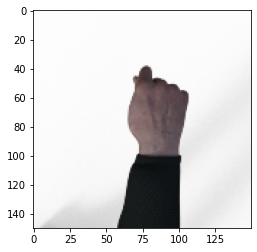

In [51]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = fn
  img_source = tf.keras.utils.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img_source)
  x = tf.keras.utils.img_to_array(img_source)
  x = np.expand_dims(x, axis = 0)

  gambar = np.vstack([x])
  kelas = model.predict(gambar, batch_size = 10)

  print(fn)
  if kelas[0, 0] == 1:
    print('Papper')
  elif kelas[0, 1] == 1:
    print('Rock')
  elif kelas[0, 2] == 1:
    print('Scissors')